1) Предположим, что Толя любит авокадо и решил посмотреть динамику цен на данный продукт в США. Имеется следующий набор данных от Hass Avocado Board 🥑:
Date — дата
- AveragePrice — средняя цена одного авокадо
- Total Volume — количество проданных авокадо
- 4046 — количество проданных авокадо PLU* 4046
- 4225 — количество проданных авокадо PLU 4225
- 4770 — количество проданных авокадо PLU 4770
- Total Bags — всего упаковок
- Small Bags — маленькие упаковки
- Large Bags — большие
- XLarge Bags — очень большие
- type — обычный или органический
- year — год
- Region — город или регион the city or region of the observation

*PLU — код товара (Product Lookup code)
*В датафрейме находятся данные не за каждый день, а за конец каждой недели. Для каждой даты есть несколько наблюдений, отличающихся по типу авокадо и региону продажи. Предположим, что нас это разделение не интересует, поэтому в avocado_mean записаны агрегированные данные, где:
avocado_mean = pd.read_csv("path",
                           index_col=0, squeeze=True, parse_dates=['Date'])

                           Date
                           2015-01-04    1.301296
                           2015-01-11    1.370648
                           2015-01-18    1.391111
                           2015-01-25    1.397130
                           2015-02-01    1.247037
                           Name: AveragePrice, dtype: float64



In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
avocado_mean = pd.read_csv(r"C:\Users\avocado_mean.csv",index_col=0,parse_dates=['Date'])

In [13]:
avocado_mean

,AveragePrice
Date,
2015-01-04,1.301296
2015-01-11,1.370648
2015-01-18,1.391111
2015-01-25,1.397130
2015-02-01,1.247037
...,...
2018-02-25,1.359630
2018-03-04,1.350185
2018-03-11,1.335093


2) Посчитайте скользящее среднее цены авокадо (AveragePrice) с окном равным 3 (window). Чему равно максимальное значение? Ответ округлите до 2 знаков после точки.

In [15]:
avocado_mean.AveragePrice.rolling(3).mean().max()
#avocado_mean.AveragePrice.rolling(3,min_periods=1).mean().max()       если не хотим чтобы были пропущ значения в начале min_periods

1.8493209876543208

3) Отлично! Помимо авокадо, Толя любит смотреть на графики. Самое время посмотреть, как изменится график в зависимости от выбранного размера окна.
Ваша задача — построить графики скользящего среднего с разными значениями параметра window (2, 4, 10, 50), посмотреть на изменения и соотнести приведенные ниже картинки с соответствующим значением размера окна. (task3.png)

<AxesSubplot:xlabel='Date'>

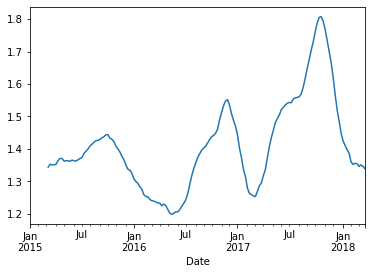

In [22]:
avocado_mean.AveragePrice.rolling(10).mean().plot()

4) ⭐️Задание со звёздочкой!⭐️
​​​​Изучите параметры функций:
- axis - по дефолту 0
- center - используется центрированное скользящ среднее, по умолчанию False
- closed - замкнутость, по умолчанию вправо
- min_periods - мин количество наблюдений, необходимое для получения среднего значения
- on
- win_type - тип окна, по умолч равномерно взвеш
- window -размер окна,т.е. количество наблюдений,по к считается среднее
в документации https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html и дайте характеристику каждой из вышеперечисленных.

5) ⭐️Задание со звёздочкой!⭐️

Используйте агрегированные данные avocado_mean.csv о ценах на авокадо и примените функцию ewm() с параметром span=2, чтобы получить экспоненциальное скользящее среднее. Запишите результат в avocado_ewm.


In [39]:
avocado_ewm=avocado_mean.ewm(span=2).mean() #больший вес наблюдениям, которые приходят позже
#- экспоненциальное скользящее среднее
avocado_ewm

,AveragePrice
Date,
2015-01-04,1.301296
2015-01-11,1.353310
2015-01-18,1.379480
2015-01-25,1.391394
2015-02-01,1.294758
...,...
2018-02-25,1.356212
2018-03-04,1.352194
2018-03-11,1.340793


In [45]:
avocado_mean.expanding().mean() #нарастает, захватывает 1 наблюдение и прибавляет по одному, 
#считает их среднее и до конца датафрейма увеличивет для подсчета среднегоб расширяющееся
avocado_mean

,AveragePrice
Date,
2015-01-04,1.301296
2015-01-11,1.370648
2015-01-18,1.391111
2015-01-25,1.397130
2015-02-01,1.247037
...,...
2018-02-25,1.359630
2018-03-04,1.350185
2018-03-11,1.335093



6) ⭐️Задание со звёздочкой!⭐️
И еще один стэп, чтобы закрепить материал. Импортируйте полные данные, (avocado_full.csv) указав index_col=0 (использовать первую колонку как индекс).
Для авокадо типа organic (type) в Чикаго (region) посчитайте скользящее среднее с окном 4 и экспоненциальное скользящее среднее с параметром span=4. Постройте графики, а затем заполните пропуски. Числа округлите до трех знаков после точки.


In [41]:
avocado_full = pd.read_csv(r"C:\Users\Леруся\Desktop\[freekurses.com] 6\[freekurses.com] Задания\avocado_full.csv",index_col=0,parse_dates=['Date'])

In [42]:
avocado_full.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,
2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.0,organic,2015,Southeast
2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.0,organic,2015,Chicago
2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.0,organic,2015,HarrisburgScranton
2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.0,conventional,2015,Pittsburgh
2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.0,organic,2015,Boise


In [51]:
avocado_full['rolling']=avocado_full.query('type=="organic" and region=="Chicago"').AveragePrice.rolling(4).mean()
avocado_full['ewm']=avocado_full.query('type=="organic" and region=="Chicago"').AveragePrice.ewm(span=4).mean()

<AxesSubplot:xlabel='Date'>

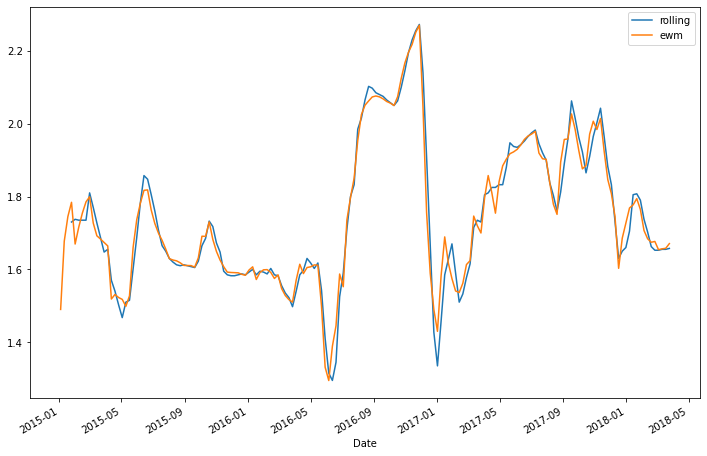

In [53]:
avocado_full[['rolling','ewm']].plot(figsize=(12,8))

In [56]:
avocado_full.query('type=="organic" and region=="Chicago"').loc['2015-01-04',['rolling','ewm']] #параметры за дату 2015-01-04 у двух колонок

rolling     NaN
ewm        1.49
Name: 2015-01-04 00:00:00, dtype: object


7) 💀 Сложное задание! 💀
Далее будем работать с данными по опозданиям в заключении сделок!
В файле delays находится информация о том какие компании с кем и на какую сумму заключали сделки, а самое важное – насколько они при этом опоздали. Вот сабсэт данных

 		client_idcompany_id	delay		revenue
 	0	2389	4240	-1 days -14:57:48.000000000	705436
 	1	7614	9544	-4 days -02:14:23.000000000	859266
 	2	2052	2427	-0 days -06:08:57.000000000	812416
 	3	9635	8054	-0 days -23:40:19.000000000	162312
 	4	8154	5503	-1 days -13:21:53.000000000	658844

Сначала давайте переведём delay в timedelta формат. Обратите внимание, что так просто столбец не переведётся – нужно будет убрать -. Сохраните данные в переменную df, отформатируйте колонку нужным способом (подсказка – уберите -) и переведите её в тип timedelta.
Могут понадобиться:
pd.to_timedelta()
pd.Series.str



In [57]:
delays = pd.read_csv(r"C:\Users\delays.csv")

In [58]:
delays.head()

,client_id,company_id,delay,revenue
0,2389,4240,-1 days -14:57:48.000000000,705436
1,7614,9544,-4 days -02:14:23.000000000,859266
2,2052,2427,-0 days -06:08:57.000000000,812416
3,9635,8054,-0 days -23:40:19.000000000,162312
4,8154,5503,-1 days -13:21:53.000000000,658844


In [62]:
delays['delay']=pd.to_timedelta(delays.delay.str.replace('-',''))#убираем -в датах и переводим в timedelta

8) Время это хорошо, но хотелось бы также разбить его на промежутки. Разбейте время на 3 интервала и поместите соответствующие значения в колонку delay_categorical
Могут понадобится:
pd.cut()



In [66]:
delays['delay_categorical']=pd.cut(delays['delay'],
      bins=3)#разбиваем на 3 промежутка
delays

,client_id,company_id,delay,revenue,delay_categorical
0,2389,4240,1 days 14:57:48,705436,"(0 days 00:27:11.587000, 1 days 16:19:58.66666..."
1,7614,9544,4 days 02:14:23,859266,"(3 days 08:05:36.333333333, 4 days 23:51:14]"
2,2052,2427,0 days 06:08:57,812416,"(0 days 00:27:11.587000, 1 days 16:19:58.66666..."
3,9635,8054,0 days 23:40:19,162312,"(0 days 00:27:11.587000, 1 days 16:19:58.66666..."
4,8154,5503,1 days 13:21:53,658844,"(0 days 00:27:11.587000, 1 days 16:19:58.66666..."
...,...,...,...,...,...
259,5837,2617,0 days 05:32:08,602129,"(0 days 00:27:11.587000, 1 days 16:19:58.66666..."
260,2384,2364,3 days 23:27:14,910660,"(3 days 08:05:36.333333333, 4 days 23:51:14]"
261,5146,3331,1 days 15:22:34,401137,"(0 days 00:27:11.587000, 1 days 16:19:58.66666..."
262,7203,5532,2 days 17:15:02,308979,"(1 days 16:19:58.666666666, 3 days 08:05:36.33..."


In [ ]:
9) 💀 Сложное задание! 💀
Разбилось конечно неплохо, но хочется чуть более целые значения и более человеческие названия. В этом нам помогут аргументы функции pd.cut! Перезадайте колонку delay_categorical, чтобы значения в ней были
'less than 1 day' – время от 0 до 1 дня
'1-2 days' – от 1 до 2 дней
'2-3 days' – от 2 до 3 дней
'more than 3 days' – больше 3 дней
Например, для следующего примера
client_id  company_id  delay            revenue
14345      54631       2 days 13:34:45  145345
54434      54834       1 days 08:26:00  453245
34905      49834       0 days 00:26:03  14543
результом будет
client_id  company_id  delay            revenue  delay_categorical
14345      54631       2 days 13:34:45  145345   2-3 days
54434      54834       1 days 08:26:00  453245   1-2 days
34905      49834       0 days 00:26:03  14543    less than 1 day
Могут понадобится:
pd.cut()
pd.to_timedelta()

In [68]:
bins=[pd.to_timedelta('0d'),
     pd.to_timedelta('1d'), #получается 4 интервала 0-1 день, 1-2 дня,2-3 дня, больше 3дней 
     pd.to_timedelta('2d'),
     pd.to_timedelta('3d'),
     pd.to_timedelta('100d')] #увеличили промежуток, чтобы все значения больше 3 дней точно попали в него

In [69]:
labels=['less than 1 day',
        '1-2 days',
        '2-3 days',
        'more than 3 days']

In [70]:
delays['delay_categorical']=pd.cut(delays['delay'],
      bins=bins,
    labels=labels )

In [74]:
delays.head()

,client_id,company_id,delay,revenue,delay_categorical
0,2389,4240,1 days 14:57:48,705436,1-2 days
1,7614,9544,4 days 02:14:23,859266,more than 3 days
2,2052,2427,0 days 06:08:57,812416,less than 1 day
3,9635,8054,0 days 23:40:19,162312,less than 1 day
4,8154,5503,1 days 13:21:53,658844,1-2 days


In [ ]:
10) Прекрасно! Теперь постройте интерактивный барплот с тем, насколько часто задерживаются сделки, выясните самый редкий и самый частый варианты

In [82]:
delays_count=delays.groupby('delay_categorical',as_index=False)\
    .agg({'company_id':'count'})
delays_count

,delay_categorical,company_id
0,less than 1 day,59
1,1-2 days,51
2,2-3 days,47
3,more than 3 days,107


<AxesSubplot:xlabel='delay_categorical', ylabel='company_id'>

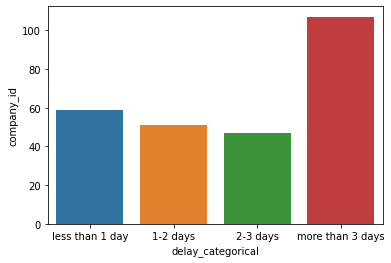

In [83]:
sns.barplot(x='delay_categorical',y='company_id',data=delays_count)